### Categorical  Naive Bayes

Categorical naive bayes is performed on a clinical data set with patient demographics and tumor attributes. The label is the survival status of the patient, and the categorical features are tumor type (recurrent vs primary), tumor histology, tumor grade, patient gender, chemotherapy staus, radiation status, methylation status, codeletion status, mutation status

#### Step 1: Data Prep

Redundant or unnecessary features must be dropped, relevant non-categorical features must be discritized and all categorical features must be encoded.

In [14]:
## load data and examine head of data
import pandas as pd
filename = "cleaned_cgga_693_clinical.csv"
df = pd.read_csv(filename)
df.head()


,sample_id,tumor_type,tumor_histology,tumor_grade,gender,age,survival_days,survival_status,radio_status,chemo_status,mutation_status,codeletion_status
0,1002,P,anaplastic astrocyma,3,F,43.0,305.0,1.0,1.0,1.0,Wildtype,Non-codel
1,1003,P,oligodendroglioma,2,F,47.0,3817.0,0.0,0.0,1.0,Mutant,Codel
2,1010,P,astrocytoma,2,M,45.0,246.0,1.0,1.0,1.0,Mutant,Non-codel
3,1012,R,oligodendroglioma,2,M,45.0,3679.0,1.0,1.0,1.0,Mutant,Non-codel
4,1014,P,astrocytoma,2,M,42.0,263.0,1.0,0.0,1.0,Wildtype,Non-codel


In [15]:
# drop redundant or unnecessary columns data
df = df.drop(columns=['sample_id','survival_days'])
df.head()


,tumor_type,tumor_histology,tumor_grade,gender,age,survival_status,radio_status,chemo_status,mutation_status,codeletion_status
0,P,anaplastic astrocyma,3,F,43.0,1.0,1.0,1.0,Wildtype,Non-codel
1,P,oligodendroglioma,2,F,47.0,0.0,0.0,1.0,Mutant,Codel
2,P,astrocytoma,2,M,45.0,1.0,1.0,1.0,Mutant,Non-codel
3,R,oligodendroglioma,2,M,45.0,1.0,1.0,1.0,Mutant,Non-codel
4,P,astrocytoma,2,M,42.0,1.0,0.0,1.0,Wildtype,Non-codel


In [16]:
# discritize age 
bins = [0, 50, 100]
labels = ['under 50', 'over 50']
df['age'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df.head()


,tumor_type,tumor_histology,tumor_grade,gender,age,survival_status,radio_status,chemo_status,mutation_status,codeletion_status
0,P,anaplastic astrocyma,3,F,under 50,1.0,1.0,1.0,Wildtype,Non-codel
1,P,oligodendroglioma,2,F,under 50,0.0,0.0,1.0,Mutant,Codel
2,P,astrocytoma,2,M,under 50,1.0,1.0,1.0,Mutant,Non-codel
3,R,oligodendroglioma,2,M,under 50,1.0,1.0,1.0,Mutant,Non-codel
4,P,astrocytoma,2,M,under 50,1.0,0.0,1.0,Wildtype,Non-codel


In [17]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import CategoricalNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import OrdinalEncoder

In [18]:
# create a list of all values for each variable IN ORDER
tumor_type=["P","R"]
tumor_histology = ['glioblastoma', 'astrocytoma','anaplastic astrocyma',
                           'oligoastrocytoma','anaplastic oligoastrocytoma','oligodendroglioma']
tumor_grade = ['2','3','4']
gender = ['F','M']

age = ['under 50','over 50']

mutation_status = ['Wildtype', 'Mutant']

codeletion_status = ['Non-codel', 'Codel']

## Instantiate the OrdinalEncoder and encode
MyOrdEncoder=OrdinalEncoder(categories=[tumor_type])
df["tumor_type"]=MyOrdEncoder.fit_transform(df[["tumor_type"]])

MyOrdEncoder=OrdinalEncoder(categories=[tumor_histology])
df["tumor_histology"]=MyOrdEncoder.fit_transform(df[["tumor_histology"]])

MyOrdEncoder=OrdinalEncoder(categories=[tumor_grade])
df["tumor_grade"]=MyOrdEncoder.fit_transform(df[["tumor_grade"]])

MyOrdEncoder=OrdinalEncoder(categories=[gender])
df["gender"]=MyOrdEncoder.fit_transform(df[["gender"]])

MyOrdEncoder=OrdinalEncoder(categories=[age])
df["age"]=MyOrdEncoder.fit_transform(df[["age"]])

MyOrdEncoder=OrdinalEncoder(categories=[mutation_status])
df["mutation_status"]=MyOrdEncoder.fit_transform(df[["mutation_status"]])

MyOrdEncoder=OrdinalEncoder(categories=[codeletion_status])
df["codeletion_status"]=MyOrdEncoder.fit_transform(df[["codeletion_status"]])

df.head()





,tumor_type,tumor_histology,tumor_grade,gender,age,survival_status,radio_status,chemo_status,mutation_status,codeletion_status
0,0.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
3,1.0,5.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


### Step 2: Split data into training and testing

In [38]:
training, testing = train_test_split(df, test_size=.3)
##  Save the Labels and then remove them from the Training and Testing data
training_label = training["survival_status"]
training=training.drop(["survival_status"], axis=1)
testing_label = testing["survival_status"]
testing=testing.drop(["survival_status"], axis=1)
print("Testing:", testing)

Testing:      tumor_type  tumor_histology  tumor_grade  gender  age  radio_status  \
293         0.0              5.0          0.0     0.0  1.0           1.0   
463         1.0              3.0          1.0     0.0  1.0           0.0   
496         0.0              0.0          2.0     1.0  1.0           1.0   
384         1.0              0.0          2.0     0.0  0.0           0.0   
147         1.0              0.0          2.0     0.0  0.0           1.0   
..          ...              ...          ...     ...  ...           ...   
600         0.0              0.0          2.0     0.0  0.0           1.0   
4           0.0              1.0          0.0     1.0  0.0           0.0   
180         0.0              1.0          0.0     1.0  0.0           0.0   
150         0.0              0.0          2.0     0.0  1.0           1.0   
480         0.0              2.0          1.0     1.0  0.0           0.0   

     chemo_status  mutation_status  codeletion_status  
293           0.0     

In [39]:
print("Testing labels:", testing_label)

Testing labels: 293    0.0
463    1.0
496    1.0
384    1.0
147    0.0
      ... 
600    0.0
4      1.0
180    0.0
150    1.0
480    1.0
Name: survival_status, Length: 185, dtype: float64


In [40]:
testing.head()

,tumor_type,tumor_histology,tumor_grade,gender,age,radio_status,chemo_status,mutation_status,codeletion_status
293,0.0,5.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
463,1.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
496,0.0,0.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0
384,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
147,1.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0


In [41]:
testing.shape

(185, 9)

In [42]:
training.head()

,tumor_type,tumor_histology,tumor_grade,gender,age,radio_status,chemo_status,mutation_status,codeletion_status
178,0.0,0.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0
119,1.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
33,0.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
143,0.0,0.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0
493,0.0,0.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0


In [44]:
training.shape

(429, 9)

#### Step 3: Run Categorical NB and produce confusion matrix

CategoricalNB()
[0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1.
 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1.
 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1.]
The Categorical NB Model Prediction Probabilities are:
[[0.983 0.017]
 [0.155 0.845]
 [0.007 0.993]
 [0.016 0.984]
 [0.169 0.831]
 [0.99  0.01 ]
 [0.877 0.123]
 [0.007 0.993]
 [0.931 0.069]
 [0.877 0.123]
 [0.009 0.991]
 [0.603 0.397]
 [0.016 0.984]
 [0.054 0.946]
 [0.004 0.996]
 [0.83  0.17 ]
 [0.909 0.091]
 [0.898 0.102]
 [0.335 0.665]
 [0.04  0.96 ]
 [0.007 0.993]
 [0.944 0.056]
 [0.917 0.083]
 [0.17  0.83 ]
 [0.8

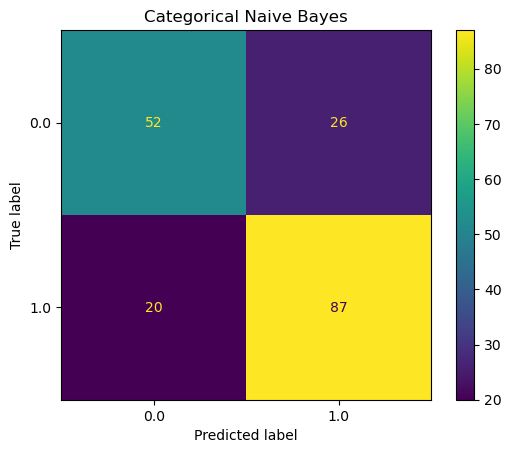

In [45]:
## Instantiate first
MyCNB = CategoricalNB()

## Training the model
My_CNB_Model = MyCNB.fit(training, training_label)
print(My_CNB_Model)

## Predict the Testing Data using the model
Predictions_C=My_CNB_Model.predict(testing)
print(Predictions_C)

## Print the actual probabilities
print("The Categorical NB Model Prediction Probabilities are:")
print(My_CNB_Model.predict_proba(testing).round(3))

## Confusion Matrix
CM_C = confusion_matrix(testing_label, Predictions_C)
print(CM_C)

## Create and display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=CM_C,display_labels=My_CNB_Model.classes_)
disp.plot()
plt.title("Categorical Naive Bayes")
plt.show()